<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/8_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [ ]:
url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

In [4]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140
u_img = np.uint8(g_img)

log scale for frequency

In [ ]:
fig, ax, = plt.subplots(1,2,figsize=(10, 5))
NFFT= 512
ax[0].imshow(g_img, cmap = 'gray')
ax[0].set_title('original image')
ax[0].axis('off');

ft = np.fft.fft2(g_img, (NFFT, NFFT))
ft = np.abs(ft)
print(f"Some points: \nft(0,0):{ft[0,0]:.3}, ft(250,250):{ft[250,250]:.3}, ft(200, 100): {ft[200,100]:.3}")
# ft = 20*np.log10(ft)
ft = np.fft.fftshift(ft)

ax[1].imshow(ft, cmap='gray', vmin=0, vmax=500000);
ax[1].axis('off');
print('this plot is without log scale')


Filtering

In [189]:
def ideal_filt(img, edges, type='lp', NFFT=512):
    M, N = img.shape
    rM, rN = round(M/2)+1, round(N/2+1) #centering the mask
    mask = np.zeros((M, N))
    if len(edges) < 2:
        x, y  = np.linspace(0, M, M), np.linspace(0, N, N)
        [x, y] = np.meshgrid(x, y)
        ind = ((x-rM)*(x-rM) + (y-rN)*(y-rN) < edges[0]**2).T
        mask[ind] = 1
    else:
        ind_x = np.arange(rM-edges[0], rM+edges[0])
        ind_y = np.arange(rN-edges[1], rN+edges[1])
        for x in ind_x:
            for y in ind_y:
                mask[x][y] = 1

    # mask = np.fft.fftshift(mask)
    if type=='hp':
        mask = -mask

    if type=='gausslp':
        h = fspecial('gaussian', [M, N], edges)
        mask = abs(ifft2(h))

    if type=='laplacian':
        mask = np.fft.fftshift(-4*np.pi*2*((x-rM)**2+(y-rN)**2)).T
    return mask

Ideal filters

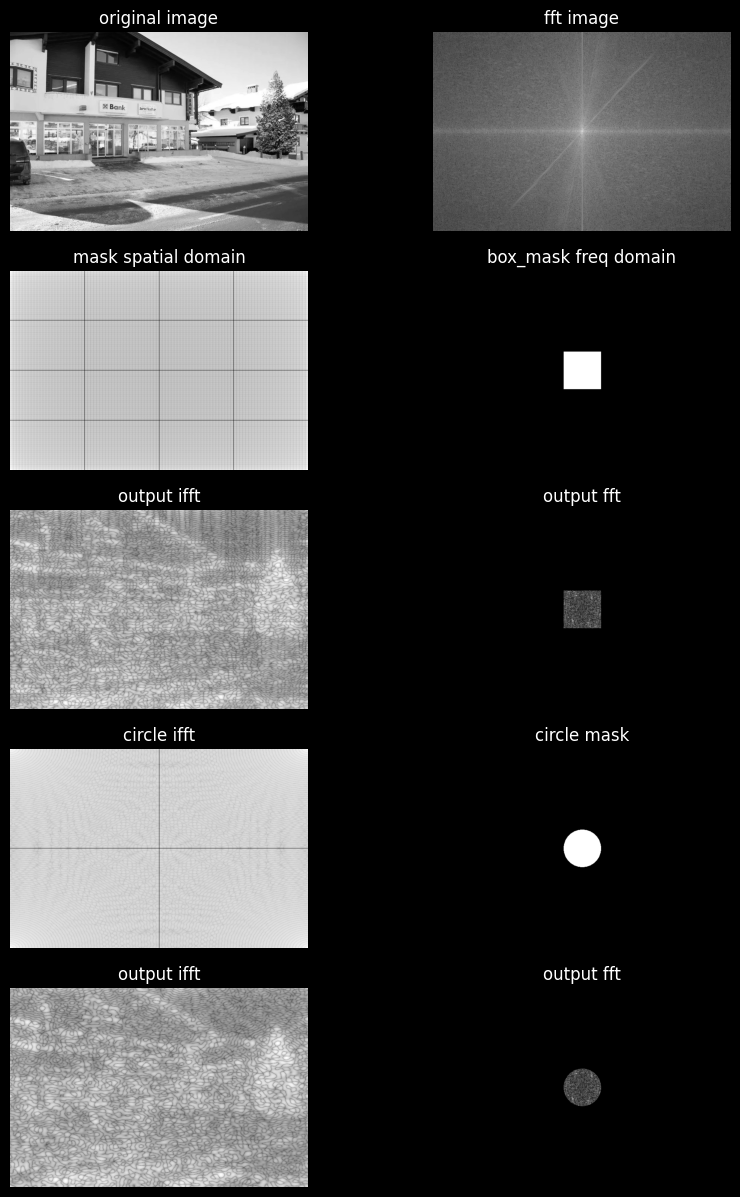

In [200]:
NFFT= g_img.shape
plt.style.use('dark_background')
box_mask = ideal_filt(g_img, [50, 50], 'lp', NFFT=NFFT)
circle_mask = ideal_filt(g_img, [50], 'lp', NFFT=NFFT)


fig, ax, = plt.subplots(5,2,figsize=(10, 15))
ft = np.fft.fft2(g_img)
ft = np.abs(ft)
ft = 20*np.log10(ft)
ft = np.fft.fftshift(ft)

ax[0][0].imshow(g_img, cmap = 'gray')
ax[0][0].set_title('original image')
ax[0][0].axis('off');
ax[0][1].imshow(ft, cmap='gray');
ax[0][1].set_title('fft image')
ax[0][1].axis('off');

ift = np.fft.ifft2(box_mask)
ift = np.abs(ift)
ift = 20*np.log10(ift+1E-20)
ax[1][0].imshow(ift, cmap='gray')
ax[1][0].set_title('mask spatial domain')
ax[1][0].axis('off');
ax[1][1].imshow(box_mask, cmap='gray', vmin=0, vmax=1)
ax[1][1].set_title('box_mask freq domain')
ax[1][1].axis('off');

ft = np.fft.fft2(g_img)
ft = box_mask*ft #Mult in freq
ift = np.fft.ifft2(ft)
# ift = np.real(ift)
ift = np.abs(ift)
ift = np.log10(ift+1E-20)
ft = np.abs(ft)

ax[2][0].imshow(ift, cmap ='gray')
ax[2][0].set_title('output ifft')
ax[2][0].axis('off')

ax[2][1].imshow(ft, cmap ='gray')
ax[2][1].set_title('output fft')
ax[2][1].axis('off');

#CIRCLE MASK
ift = np.fft.ifft2(circle_mask)
ift = np.abs(ift)
ift = 20*np.log10(ift+1E-20)

ax[3][0].imshow(ift, cmap='gray')
ax[3][0].set_title('circle ifft')
ax[3][0].axis('off');

ax[3][1].imshow(circle_mask, cmap='gray')
ax[3][1].set_title('circle mask')
ax[3][1].axis('off');

ft = np.fft.fft2(g_img)
ft = circle_mask*ft #Mult in freq
ift = np.fft.ifft2(ft)
# ift = np.real(ift)
ift = np.abs(ift)
ift = np.log10(ift+1E-20)
ft = np.abs(ft)
ax[4][0].imshow(ift, cmap='gray')
ax[4][0].set_title('output ifft')
ax[4][0].axis('off');
ax[4][1].imshow(ft, cmap='gray')
ax[4][1].set_title('output fft')
ax[4][1].axis('off');

Non-ideal filters

LOW PASS FILTER

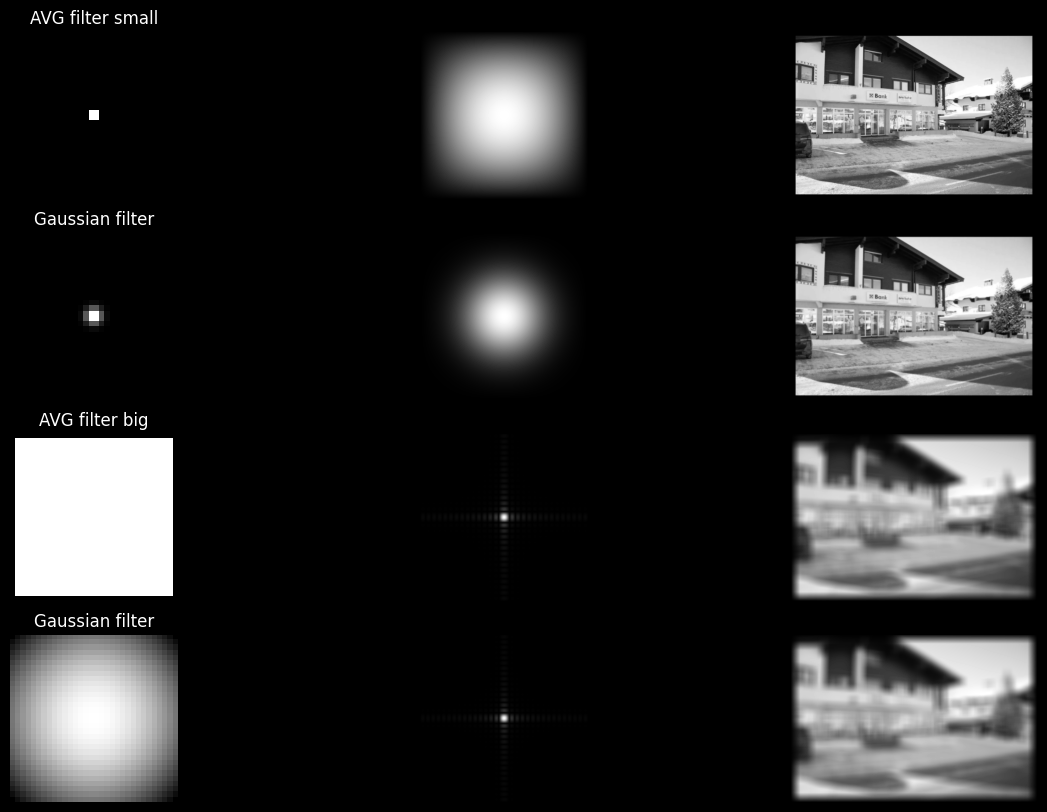

In [11]:
from scipy.signal import convolve2d
NFFT= 512
F = np.zeros((32,32))
F[15:-15, 15:-15] = 1./9

plt.style.use('dark_background')
fig, ax = plt.subplots(4,3, figsize=(15, 10))

ax[0][0].imshow(F, cmap='gray')
ax[0][0].set_title('AVG filter small')
ax[0][0].axis('off')

ft = np.fft.fft2(F, (NFFT,NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[0][1].imshow(ft, cmap='gray')
ax[0][1].axis('off');


cim = convolve2d(g_img, F)
ax[0][2].imshow(cim, cmap='gray')
ax[0][2].axis('off')

F = np.zeros((32, 32))
F[1:-1,1:-1] = np.ones((30,30))/900

ax[2][0].imshow(F, cmap='gray')
ax[2][0].set_title('AVG filter big')
ax[2][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[2][1].imshow(ft, cmap='gray')
ax[2][1].axis('off');

cim = convolve2d(g_img, F)
ax[2][2].imshow(cim, cmap='gray')
ax[2][2].axis('off')



# Gaussian
def gaussian_filter(size, sigma):
    # Create 1D Gaussian kernel
    kernel_1d = np.linspace(-(size//2), size//2, size)
    kernel_1d = np.exp(-(kernel_1d**2) / (2*(sigma**2)))
    kernel_1d /= np.sum(kernel_1d)
    # Create 2D Gaussian kernel
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    return kernel_2d

# F = ideal_filt(F, [sigma], 'gaussianlp')
sigma = 1
F = gaussian_filter(32, sigma)

ax[1][0].imshow(F, cmap='gray')
ax[1][0].set_title('Gaussian filter')
ax[1][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[1][1].imshow(ft, cmap='gray')
ax[1][1].axis('off');

cim = convolve2d(g_img, F)
ax[1][2].imshow(cim, cmap='gray')
ax[1][2].axis('off');

sigma = 30
F = gaussian_filter(32, sigma)

ax[3][0].imshow(F, cmap='gray')
ax[3][0].set_title('Gaussian filter')
ax[3][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[3][1].imshow(ft, cmap='gray')
ax[3][1].axis('off');

cim = convolve2d(g_img, F)
ax[3][2].imshow(cim, cmap='gray')
ax[3][2].axis('off');

High pass filter

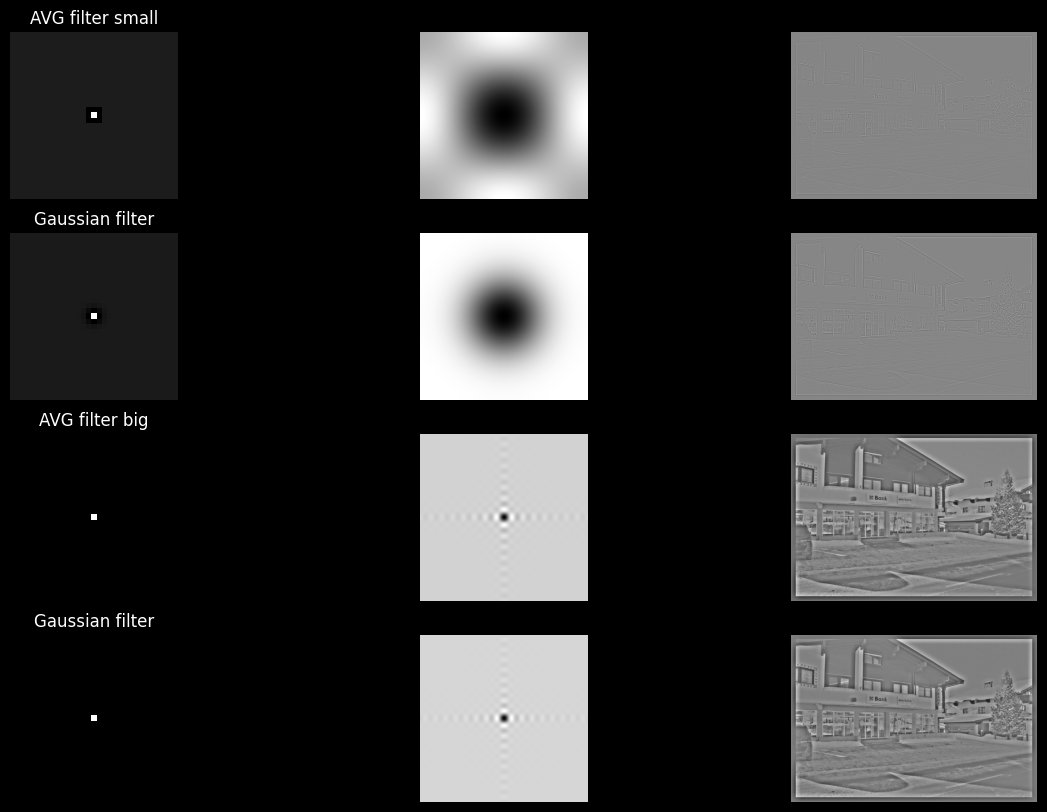

In [14]:
from scipy.signal import convolve2d
NFFT= 512
ID = np.zeros((33,33))
ID[16,16]=1
plt.style.use('dark_background')
fig, ax = plt.subplots(4,3, figsize=(15, 10))


F = np.zeros((33,33))
F[15:-15, 15:-15] = 1./9
F=ID-F
ax[0][0].imshow(F, cmap='gray')
ax[0][0].set_title('AVG filter small')
ax[0][0].axis('off')

ft = np.fft.fft2(F, (NFFT,NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[0][1].imshow(ft, cmap='gray')
ax[0][1].axis('off');


cim = convolve2d(g_img, F)
ax[0][2].imshow(cim, cmap='gray')
ax[0][2].axis('off')

F = np.zeros((33, 33))
F[1:-1,1:-1] = 1/(33*33)
F=ID-F
ax[2][0].imshow(F, cmap='gray')
ax[2][0].set_title('AVG filter big')
ax[2][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[2][1].imshow(ft, cmap='gray')
ax[2][1].axis('off');

cim = convolve2d(g_img, F)
ax[2][2].imshow(cim, cmap='gray')
ax[2][2].axis('off')



# Gaussian
def gaussian_filter(size, sigma):
    # Create 1D Gaussian kernel
    kernel_1d = np.linspace(-(size//2), size//2, size)
    kernel_1d = np.exp(-(kernel_1d**2) / (2*(sigma**2)))
    kernel_1d /= np.sum(kernel_1d)
    # Create 2D Gaussian kernel
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    return kernel_2d

# F = ideal_filt(F, [sigma], 'gaussianlp')
sigma = 1
F = gaussian_filter(33, sigma)
F=ID-F
ax[1][0].imshow(F, cmap='gray')
ax[1][0].set_title('Gaussian filter')
ax[1][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[1][1].imshow(ft, cmap='gray')
ax[1][1].axis('off');

cim = convolve2d(g_img, F)
ax[1][2].imshow(cim, cmap='gray')
ax[1][2].axis('off');

sigma = 30
F = gaussian_filter(33, sigma)
F=ID-F
ax[3][0].imshow(F, cmap='gray')
ax[3][0].set_title('Gaussian filter')
ax[3][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[3][1].imshow(ft, cmap='gray')
ax[3][1].axis('off');

cim = convolve2d(g_img, F)
ax[3][2].imshow(cim, cmap='gray')
ax[3][2].axis('off');

Laplacian filter

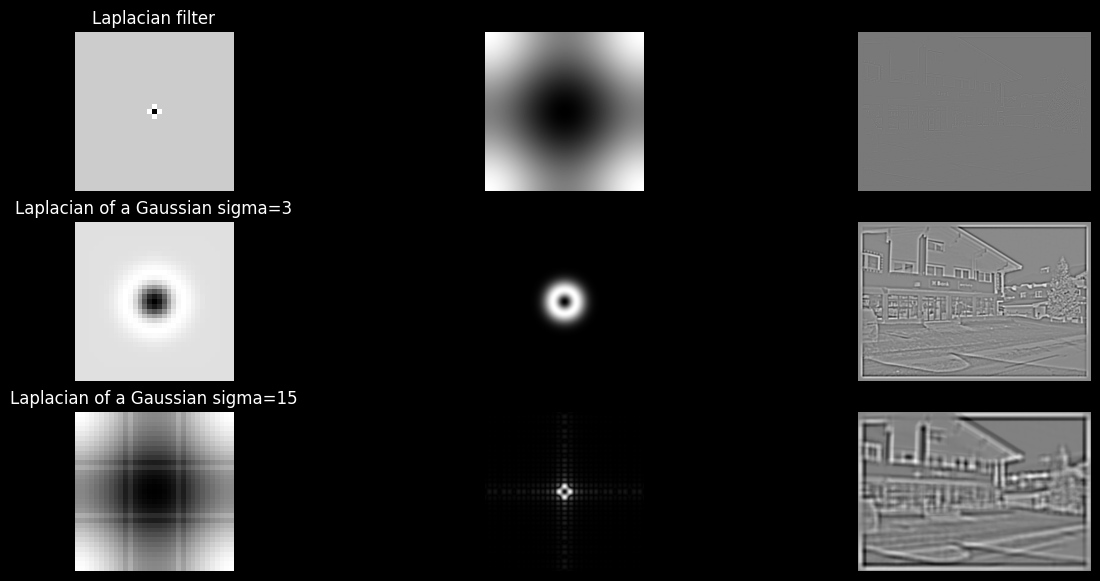

In [30]:
# mask = np.fft.fftshift(-4*np.pi*2*((x-rM)**2+(y-rN)**2)).T
from scipy.signal import convolve2d
from scipy import ndimage

NFFT= 512

plt.style.use('dark_background')
fig, ax = plt.subplots(3,3, figsize=(15, 7))

size= 33

F = np.zeros((size,size)) #Identity
F[size//2,size//2]=1
F = ndimage.laplace(F)

ax[0][0].imshow(F, cmap='gray')
ax[0][0].set_title('Laplacian filter')
ax[0][0].axis('off')

ft = np.fft.fft2(F, (NFFT,NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[0][1].imshow(ft, cmap='gray')
ax[0][1].axis('off');


cim = convolve2d(g_img, F)
ax[0][2].imshow(cim, cmap='gray')
ax[0][2].axis('off')


#Laplacian of a Gaussian
sigma = 3
F = np.zeros((size,size)) #Identity
F[size//2,size//2]=1
F = ndimage.gaussian_filter(F, sigma)
F = ndimage.laplace(F)

ax[1][0].imshow(F, cmap='gray')
ax[1][0].set_title(f'Laplacian of a Gaussian sigma={sigma}')
ax[1][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[1][1].imshow(ft, cmap='gray')
ax[1][1].axis('off');

cim = convolve2d(g_img, F)
ax[1][2].imshow(cim, cmap='gray')
ax[1][2].axis('off');

#Laplacian of a Gaussian
sigma = 15
F = np.zeros((size,size)) #Identity
F[size//2,size//2]=1
F = ndimage.gaussian_filter(F, sigma)
F = ndimage.laplace(F)

ax[2][0].imshow(F, cmap='gray')
ax[2][0].set_title(f'Laplacian of a Gaussian sigma={sigma}')
ax[2][0].axis('off')

ft = np.fft.fft2(F, (NFFT, NFFT))
ft = np.fft.fftshift(ft)
ft = np.abs(ft)
ax[2][1].imshow(ft, cmap='gray')
ax[2][1].axis('off');

cim = convolve2d(g_img, F)
ax[2][2].imshow(cim, cmap='gray')
ax[2][2].axis('off');

# Aliasing

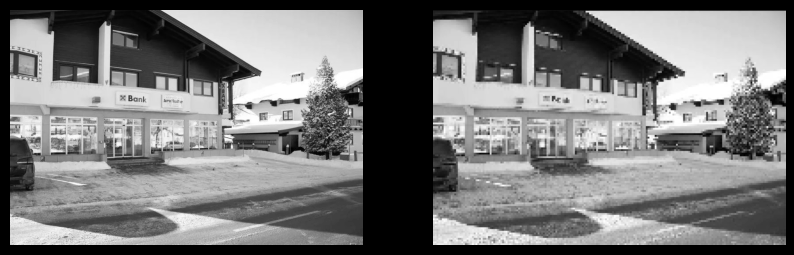

In [41]:
fix, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(g_img, cmap='gray')
ax[0].axis('off')

# x = np.arange(0, g_img.shape[0], 1)
# y = np.arange(0, g_img.shape[1], 1)
down_img = g_img[::4, ::4]
ax[1].imshow(down_img, cmap='gray')
ax[1].axis('off');